<a href="https://colab.research.google.com/github/KIMssy/Basic-statistics-programming/blob/main/moving_average_passengers_bus01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/passengers bus.csv',sep=',',encoding='euc-kr')

In [4]:
print(data)

           기준_날짜   행정동_ID  passengers
0       20220920  1124082       15406
1       20220920  1124081       12210
2       20220920  1106091        8236
3       20220920  1111079       13031
4       20220920  1121069       21983
...          ...      ...         ...
111083  20220101  1110061        2480
111084  20220101  1110060        3485
111085  20220101  1110056        2377
111086  20220101  1115069        2229
111087  20220101  1115065        1353

[111088 rows x 3 columns]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111088 entries, 0 to 111087
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   기준_날짜       111088 non-null  int64
 1   행정동_ID      111088 non-null  int64
 2   passengers  111088 non-null  int64
dtypes: int64(3)
memory usage: 2.5 MB


In [6]:
def get_bus(i):
    z = data['passengers'][i]  
    return z

In [7]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1): #인덱스는 0에서부터 시작하기 때문에 n-1을 해야함
      x_n[i] = x_n[i+1]
      x_n[n-1] = x_meas
      x_avg = np.mean(x_n)

    return x_avg, x_n

    #이동평균필터

In [8]:
len(data)

111088

In [9]:
#input paramoters

n_samples = 9154 #n_sample은 그대로, 데이터 갯수여서

n=10
time_end = 10

In [10]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [11]:
print(time)
print(x_meas_save)
print(x_avg_save)

[0.00000000e+00 1.09241861e-03 2.18483723e-03 ... 9.99672274e+00
 9.99781516e+00 9.99890758e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
for i in range(n_samples):
  x_meas = get_bus(i)
  if i == 0:
      x_avg, x_n = x_meas, x_meas * np.ones(n)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas * np.ones(n))
  else:
    x_avg, x_n = mov_avg_filter(x_n, x_meas)
    print(x_n)
  x_meas_save[i] = x_meas
  x_avg_save[i] = x_avg

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[ 1527. 11445.  3787.  1197.  1808.  1860.  1798.  1859.  3087.  3087.]
[11445.  3787.  1197.  1808.  1860.  1798.  1859.  3087.  1710.  1710.]
[3787. 1197. 1808. 1860. 1798. 1859. 3087. 1710. 6161. 6161.]
[1197. 1808. 1860. 1798. 1859. 3087. 1710. 6161. 1622. 1622.]
[1808. 1860. 1798. 1859. 3087. 1710. 6161. 1622. 2724. 2724.]
[1860. 1798. 1859. 3087. 1710. 6161. 1622. 2724. 3299. 3299.]
[1798. 1859. 3087. 1710. 6161. 1622. 2724. 3299. 2794. 2794.]
[1859. 3087. 1710. 6161. 1622. 2724. 3299. 2794. 2112. 2112.]
[3087. 1710. 6161. 1622. 2724. 3299. 2794. 2112. 1858. 1858.]
[1710. 6161. 1622. 2724. 3299. 2794. 2112. 1858.  766.  766.]
[6161. 1622. 2724. 3299. 2794. 2112. 1858.  766. 1877. 1877.]
[1622. 2724. 3299. 2794. 2112. 1858.  766. 1877. 4480. 4480.]
[ 2724.  3299.  2794.  2112.  1858.   766.  1877.  4480. 10589. 10589.]
[ 3299.  2794.  2112.  1858.   766.  1877.  4480. 10589.  2298.  2298.]
[ 2794.  2112.  1858.   766.  1877.  4480. 10589.  2298.

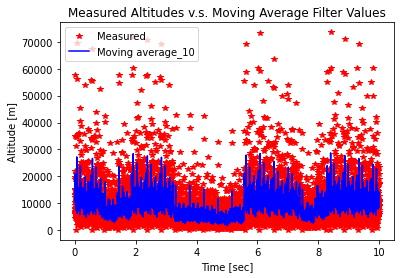

In [15]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average_10')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/png')